In [0]:
from numpy import random
from math import gamma, pi 
import numpy as np

def vol(N,d):
    nhits = 0
    for i in range(N):
        x = random.uniform(-1,1,d)
        if sum(x ** 2) < 1: 
            nhits += 1
    return 2 ** d * nhits / N


def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)

def wow():
    d = 2
    while(True):
      N = 1000000
      print(str(d) + " Dimensions:")
      test = round(vol (N,d) , 9)
      if test == 0:
        print("Reached the end")
        return
      real = round(Vol1 (d) , 9)
      error = round(abs((test-real))/real , 9)
      print ("The Monte Carlo estimate of ω(" + str(d) + ") is  : ", test)
      print("The actual value of ω(" + str(d) + ") is  : ", real)
      print("Error is : ", error)
      print()
      d += 1

In [0]:
wow()

2 Dimensions:
The Monte Carlo estimate of ω(2) is  :  3.140364
The actual value of ω(2) is  :  3.141592654
Error is :  0.000391093

3 Dimensions:
The Monte Carlo estimate of ω(3) is  :  4.193752
The actual value of ω(3) is  :  4.188790205
Error is :  0.001184541

4 Dimensions:
The Monte Carlo estimate of ω(4) is  :  4.932944
The actual value of ω(4) is  :  4.934802201
Error is :  0.00037655

5 Dimensions:
The Monte Carlo estimate of ω(5) is  :  5.262528
The actual value of ω(5) is  :  5.263789014
Error is :  0.000239564

6 Dimensions:
The Monte Carlo estimate of ω(6) is  :  5.15392
The actual value of ω(6) is  :  5.16771278
Error is :  0.00266903

7 Dimensions:
The Monte Carlo estimate of ω(7) is  :  4.720896
The actual value of ω(7) is  :  4.72476597
Error is :  0.000819082

8 Dimensions:
The Monte Carlo estimate of ω(8) is  :  4.02176
The actual value of ω(8) is  :  4.058712126
Error is :  0.009104397

9 Dimensions:
The Monte Carlo estimate of ω(9) is  :  3.267584
The actual value of

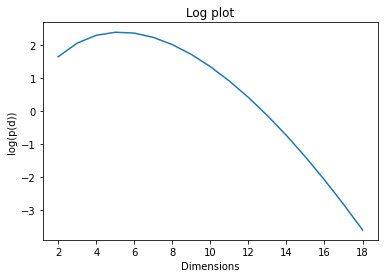

In [0]:
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

logaxis = []
daxis = []
for d in range (2,19):
  daxis.append(d)
  logaxis.append(round(np.log2(Vol1(d)), 3))


plt.figure(2)
plt.plot(daxis, logaxis)
plt.xlabel('Dimensions')
plt.ylabel('log(p(d))')
plt.title('Log plot')
plt.show()

## Παραδοτέο 1

α) Γράψαμε την ρουτίνα wow η οποία καλεί τις δοσμένες συναρτήσεις για να υπολογίσει τα ζητόυμενα. Παρατηρούμε ότι όσο αυξάνονται οι διαστάσεις μεγαλώνει το σφάλμα μας. Παρατηρούμε αστοχία για d = 17 όπου σε 1000000 δείγματα ούτε ενα δεν βρέθηκε στη μπάλα.

β) Παρατηρούμε ότι καθώς ανεβαίνουμε διάσταση μειώνεται η πιθανότητα $p(d)$ Αυτό συνεπαγέται ότι σε μεγαλύτερες διαστάσεις πρέπει να λάβουμε περισσότερα δείγματα ώστε να μπορούμε να υπολογίσουμε ικανοποιητική προσέγγιση για τον όγκο της μπάλας. Επειδή λοιπόν έχουμε σταθερό την αριθμό των δειγμάτων δεν επιτυγχάνυμε ικανοποιητική προσέγγιση. Ενδεικτικά για d = 17 και Ν = 1000000 με 2-3 προσπάθειες πέτυχα 1 σημείο εντός της μοναδιαίας μπάλας.


γ)Η πιθανότητα να πετύχουμε σημείο εντός της μοναδιαίας μπάλας για d = 20 είναι πάρα πολύ μικρή (της τάξης $2e-8$). Έτσι για να πετύχουμε 1000 σημεία εντός του μοναδιαίας μπάλας θα χρειαζόμαστε 2*10^12 δείγματα. Όσον αφορά τον χρόνο 10^6 δείγματα στο Google Colab χρείαστηκαν 10 sec άρα 10^12 θα χρειαστούν 10^7 δευτερολέπτα το οποίο είναι περιπου 16.5 εβδομαδές (μια καραντίνα δεν φτάνει...).

In [1]:
import random as r

def ball(delta):
    N = 100 # number of steps to approach equilibrium
    samples = 1000 
    point_x = []
    point_y = []

    for _ in range(samples):
        x = [0,0]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = r.choice([0,1])  ## choose a jump direction at random
            z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump

        point_x.append(x[0])
        point_y.append(x[1])
    return (point_x,point_y)

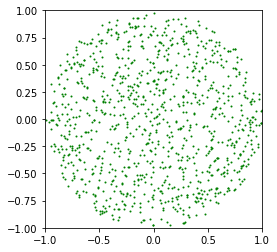

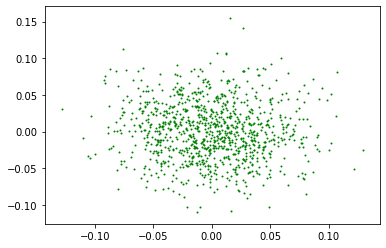

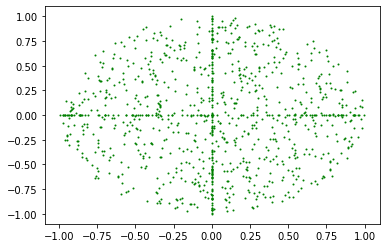

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

(point_x,point_y) = ball(1)
plt.scatter(point_x, point_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

(point_x,point_y) = ball(0.01)
plt.scatter(point_x, point_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

(point_x,point_y) = ball(20)
plt.scatter(point_x, point_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()


In [0]:
def magic(points,x):
  for i in range(len(x)):
    points[i].append(x[i]**2)
  return points

def dball(d):
    delta = 1
    N = 100 # number of steps to approach equilibrium
    samples = 10000
    points = [[] for _ in range(d)]

    for _ in range(samples):
        x = [0] * d  ## start at the centre of th disc. This variable will keep the position of the chain

        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it
        choices = list(range(0,d))

        for _ in range(N):
            k = r.choice(choices)  ## choose a jump direction at random
            z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
      
        points = magic(points,x)
    return points

In [0]:
def test(d,previous):
  points = dball(d-1)
  samples = 10000
  nhits = 0
  points = [sum(col) for col in zip(*points)]
  for i in range(samples):
    z = r.uniform(-1,1)
    if points[i] + z**2 <1:
      nhits += 1
  return(nhits/samples * 2 * previous)

In [0]:
for d in range(2,101):
  if d ==2:
    new = test(2,2)
  else:
    new = test(d,new)
  print("Dimensions :",d,"\n", new,Vol1(d), abs(new-Vol1(d))/Vol1(d))


Dimensions : 2 
 3.1372 3.141592653589793 0.0013982250642118699
Dimensions : 3 
 4.171221119999999 4.1887902047863905 0.0041943100340321605
Dimensions : 4 
 4.930383363839999 4.934802200544679 0.0008954435304807737
Dimensions : 5 
 5.2695937392721905 5.263789013914325 0.0011027655824580836
Dimensions : 6 
 5.146285245773221 5.167712780049969 0.0041464251572706536
Dimensions : 7 
 4.748992024799528 4.7247659703314016 0.005127461258451979
Dimensions : 8 
 4.065137173228396 4.058712126416768 0.0015830259972886588
Dimensions : 9 
 3.3285343174394106 3.2985089027387064 0.009102723559658882
Dimensions : 10 
 2.609570904872498 2.550164039877345 0.023295311229472985
Dimensions : 11 
 1.9655288055499653 1.8841038793898994 0.04321679237051011
Dimensions : 12 
 1.408497942057105 1.3352627688545893 0.05484701207189217
Dimensions : 13 
 0.978906069729688 0.910628754783283 0.07497821103030515
Dimensions : 14 
 0.6435328502402968 0.5992645293207919 0.07387108489414314
Dimensions : 15 
 0.398346834298

## Παραδοτέο 2

α) Παρατηρούμε ότι για μεγάλο βήμα (20) τα περισσότερα σημεία πέφτουν στους άξονες x,y. Αυτό είναι λογικό καθώς στα 100 βήματα τα περισσότερα τείνουν να βγάλουν την αλυσίδα εκτός της μοναδιαίας μπάλας και ιδίος σε περίπτωση που έχουμε κινηθεί ήδη μακριά από το κέντρο. Από την άλλη πλευρά για πολύ μικρό delta (0.1) η αλυσίδα δεν προλαβαίνει να εξελιχθεί αρκετά ώστε να μας δώσει ικανοποιητικό αποτέλεσμα. 

β) Τα αποτελέσματα για d=2,...,100 είναι παραπάνω. παρατηρούμε για μεγάλα d επιτυγχάνουμε μεν εκτίμηση του όγκου της μπάλας αλλά το σφάλμα μεγαλώνει πολύ. Αυτό συμβαίνει τόσο γιατί αλυσιδωτά μεταδίδεται το σφάλμας της προηγούμενης προσέγγισης όσο και γιατί πέφτουμε σε πολύ μικρούς αριθμούς και άρα έχουμε αδυναμίες λόγω ακρίβειας αποτελεσμάτων.